In [48]:
import pandas as pd

In [49]:
dataset=pd.read_csv('student_scores.csv')
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [50]:
dataset.shape

(25, 2)

In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [52]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


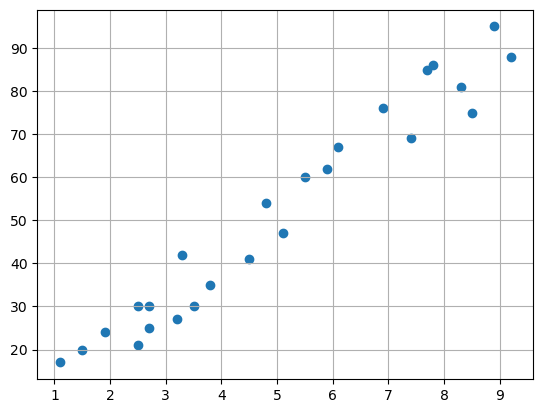

In [53]:
import matplotlib.pyplot as plt
plt.scatter(dataset['Hours'],dataset['Scores'])
plt.grid(True)
plt.show()

In [54]:
dataset.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [55]:
from sklearn.model_selection import train_test_split
x= dataset[['Hours']]
y= dataset['Scores']
X_train,X_test, y_train,y_test= train_test_split(x,y,test_size=0.2,train_size=0.8,random_state=42)
print(X_train.count(),y_train.count())
print(X_test.count(),y_test.count())


Hours    20
dtype: int64 20
Hours    5
dtype: int64 5


In [56]:
from sklearn.linear_model import LinearRegression
myModel=LinearRegression()


In [57]:
myModel.fit(X_train,y_train)

LinearRegression()

In [58]:
intercept= myModel.intercept_
slope=myModel.coef_[0]
print( f"y = {intercept:.2f} + {slope:.2f} * X")

y = 2.83 + 9.68 * X


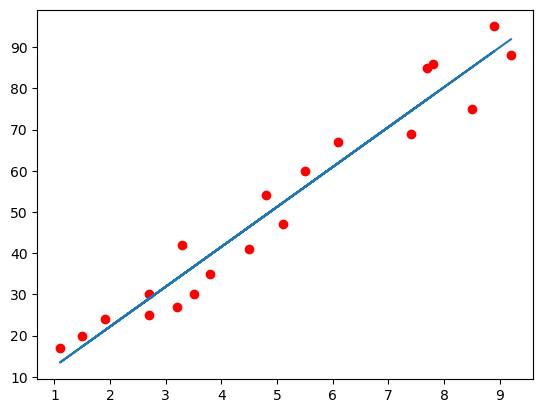

In [59]:
plt.scatter(X_train,y_train , c="red")
plt.plot(X_train, intercept+X_train*slope)
plt.show()

In [60]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error

y_train_predicted=myModel.predict(X_train)
r_squared=r2_score(y_train,y_train_predicted)
mae=mean_absolute_error(y_train,y_train_predicted)
mse=mean_squared_error(y_train,y_train_predicted)
rmse=root_mean_squared_error(y_train,y_train_predicted)
print('r_squared :'  , r_squared)
print('mae :',mae)
print('mse :' ,mse)
print('rmse :' ,rmse)


r_squared : 0.9491209376364416
mae : 5.221357478352558
mse : 31.45483552736685
rmse : 5.608461065868858


In [62]:
y_test_predicted=myModel.predict(X_test)
r_squared=r2_score(y_test,y_test_predicted)
mae=mean_absolute_error(y_test,y_test_predicted)
mse=mean_squared_error(y_test,y_test_predicted)
rmse=root_mean_squared_error(y_test,y_test_predicted)
print('r_squared :'  , r_squared)
print('mae :',mae)
print('mse :' ,mse)
print('rmse :' ,rmse)


r_squared : 0.9678055545167993
mae : 3.920751190209927
mse : 18.943211722315283
rmse : 4.352380006653289


<function matplotlib.pyplot.show(close=None, block=None)>

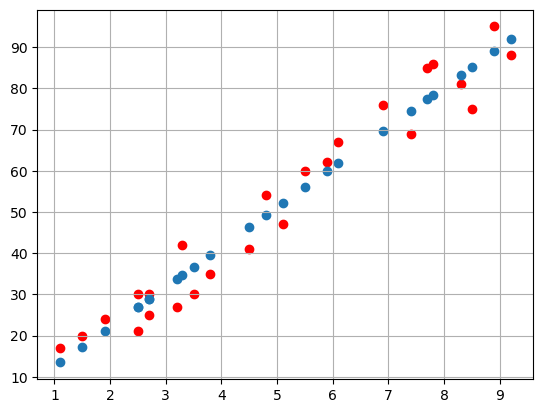

In [66]:
plt.scatter(x,y,c='red')
plt.scatter(x,myModel.predict(x))
plt.grid(True)
plt.show